# Loading EM Images into Tensors

In [1]:
from ipywidgets import interact
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import PIL
import imageio
import libtiff

In [2]:
torch.cuda.set_device(1)

## Set path for data

In [3]:
# Modify accordingly
path = Path('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/')

dataset_name = 'semi-synthetic_tSEM'

lr_name = f'testing/LR/{dataset_name}/'
lr_path = path/f'{lr_name}'
lr_files = list(lr_path.glob('*.tif'))

hr_name = f'testing/HR/{dataset_name}/'
hr_path = path/f'{hr_name}'
hr_files = list(hr_path.glob('*.tif'))

print('Processing '+str(len(lr_files))+' files...')

Processing 66 files...


In [4]:
def load_img(img_fn):
    """Loads input image into matrix using filename"""
    img = libtiff.TiffFile(img_fn)
    img_mat = img.get_tiff_array()[0].astype(np.float32)[np.newaxis, :]
    return img_mat

In [5]:
# sort filenames so that they are aligned for visualization
lr_files = sorted(lr_files)
hr_files = sorted(hr_files)

## Here we validate that the image tensors are identical to the original image i.e. no information loss 

In [6]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


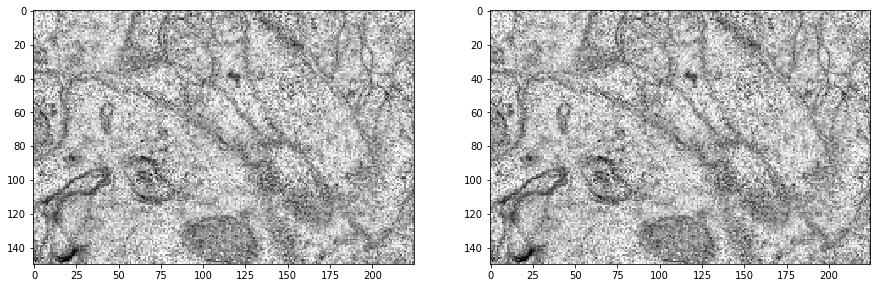

In [7]:
sn = 8 # image number
im = load_img(lr_files[sn]) # load image to tensor
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(im), cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(plt.imread(lr_files[sn]), cmap=plt.cm.gray) # visualize original image file
plt.show() # show visualization

## Here we visualize LR-HR pairs of images for comparison

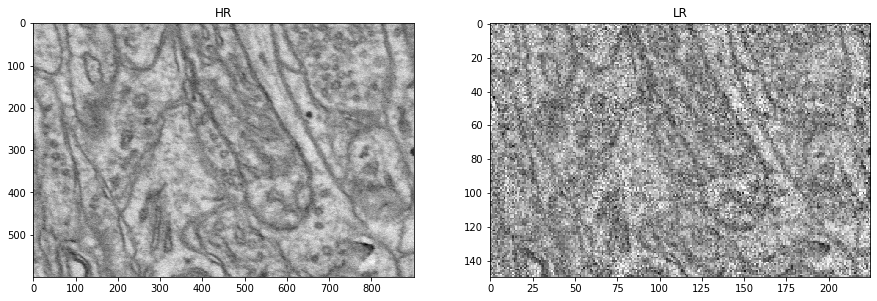

In [8]:
sn = 25 # image number
lr_im = load_img(lr_files[sn]) # load image to tensor
hr_im = load_img(hr_files[sn])
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
axarr[0].set_title("HR")
axarr[1].imshow(np.squeeze(lr_im), cmap=plt.cm.gray) # visualize original image file
axarr[1].set_title("LR")
plt.show() # show visualization

In [9]:
def visualize_sample(lr_fn, hr_fn):
    lr_im = load_img(lr_fn) # load image to tensor
    hr_im = load_img(hr_fn)
    f, axarr = plt.subplots(1,2) # create visualizations
    axarr[0].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
    axarr[0].set_title("HR")
    axarr[1].imshow(np.squeeze(lr_im), cmap=plt.cm.gray) # visualize original image file
    axarr[1].set_title("LR")
    plt.show() # show visualization

In [10]:
@interact
def show_sample(sample_num=19):
    return visualize_sample(lr_files[sn], hr_files[sn])

interactive(children=(IntSlider(value=19, description='sample_num', max=57, min=-19), Output()), _dom_classes=…